In [2]:
import numpy as np
import matplotlib.pyplot as plt

import Python.density_matrix as DM
from Python.random_hamiltonian import random_hamiltonian
from Python.ket import canonical_basis, energy_basis

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


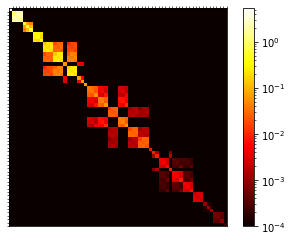

In [3]:
#the initial populations of each qbit
pops = [.1, .1, .1, .1, .1, 10]

# an nqbit system with the specified pops.
system = DM.nqbit(pops)
system.change_to_energy_basis()

#the identity in the energy basis of 3 qbits. This is usefull for calculating the full hamiltonian.
I = DM.Identity(energy_basis(3))

#we are going to do 1000 steps.
for i in range(1000):
    
    #every ten steps print the progress
    if i%100==0:print(i/10)
    
    #Calculate a random hamiltonain 
    H = random_hamiltonian(3).tensor(I) + I.tensor(random_hamiltonian(3))
    
    #get the unitary by matrix exponentiation
    U = DM.exp(H * .1j)
    
    #change to the energu basis so it can act on the system.
    U.change_to_energy_basis() 
   
    #update the system
    system = U * system * U.H
    
system.plot()